In [1]:
from pathlib import Path

PATH_TO_EXAMPLE_OBJECTS = "/home/yunusskeete/Documents/data/3D/Cap3D/local-split/unzips/compressed_imgs_perobj_00.zip/Cap3D_Objaverse_renderimgs"
path_to_example_objects = Path(PATH_TO_EXAMPLE_OBJECTS)
EXAMPLE_OBJECT = "000a0c5cdc3146ea87485993fbaf5352"

IMAGE_FILE_EXTENSION = ".png"
IMAGE_FILE_DELIMETER = "_"

object_folder = path_to_example_objects / EXAMPLE_OBJECT
object_folder

PosixPath('/home/yunusskeete/Documents/data/3D/Cap3D/local-split/unzips/compressed_imgs_perobj_00.zip/Cap3D_Objaverse_renderimgs/000a0c5cdc3146ea87485993fbaf5352')

In [2]:
image_objects: Path = list(
    sorted(
        (
            file
            for file in object_folder.iterdir()
            if file.suffix == IMAGE_FILE_EXTENSION
            and IMAGE_FILE_DELIMETER not in file.name
        ),
        key=lambda x: x.name,
    )
)

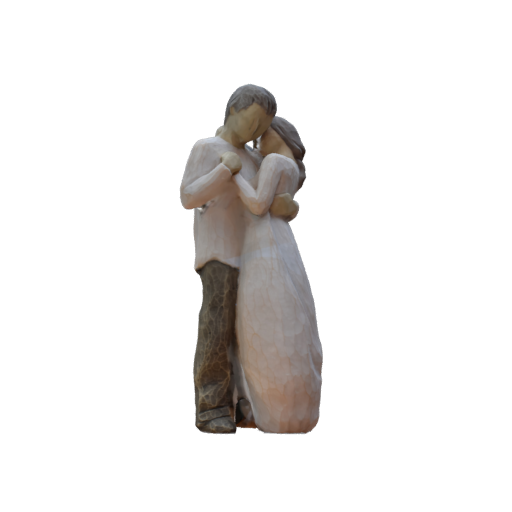

In [3]:
from PIL import Image

path_to_image = image_objects[3]  # 3, 4, 7, 10, 12, 15, 17

image = Image.open(path_to_image)
image

In [8]:
from PIL import Image
import logging

pil_logger = logging.getLogger("PIL")
if pil_logger.hasHandlers():
    pil_logger.setLevel(logging.INFO)

images = [Image.open(image_objects[i]) for i in [3, 4, 7, 10, 12, 15, 17]]

In [5]:
# sentence_transformers_logger = logging.getLogger("transformers")
# if sentence_transformers_logger.hasHandlers():
#     sentence_transformers_logger.setLevel(logging.INFO)

In [7]:
from sentence_transformers import SentenceTransformer, util

MODEL_NAME = "clip-ViT-B-32"

# Load CLIP model
model = SentenceTransformer(MODEL_NAME)

# Encode an image:
img_emb = model.encode(images)
img_emb.shape

(7, 512)

In [9]:
from sentence_transformers import SentenceTransformer, util

MODEL_NAME = "clip-ViT-B-32"

# Load CLIP model
model = SentenceTransformer(MODEL_NAME)

# Encode an image:
img_emb = model.encode(image)
img_emb.shape

(512,)

In [58]:
from utils.descriptions import get_latest_descriptions

PERFORMING_CHECKSUM = False

descriptions_dict = get_latest_descriptions(performing_checksum=PERFORMING_CHECKSUM)
print(len(descriptions_dict))

description = descriptions_dict.get("000a0c5cdc3146ea87485993fbaf5352", "")
description

2024-05-02 15:27:22,212 - INFO - Get latest descriptions process started for file: 'Cap3D_automated_Objaverse_full.csv'
2024-05-02 15:27:22,213 - INFO - Get latest descriptions process started for file: 'Cap3D_automated_Objaverse_full.csv'
2024-05-02 15:27:22,214 - INFO - Reading  descriptions file
2024-05-02 15:27:25,986 - INFO - Generating hashmap from latest descriptions file
2024-05-02 15:27:26,137 - INFO - Get latest descriptions process successfuly completed for file: 'Cap3D_automated_Objaverse_full.csv'


1006782


'sculpture of a man and woman hugging each other.'

In [59]:
# Encode text descriptions
text_emb = model.encode(
    [
        description,
        "Two dogs in the snow",
        "A cat on a table",
        "A picture of London at night",
    ]
)

# Compute cosine similarities
cos_scores = util.cos_sim(img_emb, text_emb)
print(cos_scores)

Batches: 100%|██████████| 1/1 [00:00<00:00, 82.75it/s]

tensor([[0.3483, 0.1849, 0.1737, 0.1784]])
